Link to Kaggle Contest:
https://www.kaggle.com/c/digit-recognizer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch

import sklearn
from sklearn.model_selection import train_test_split

print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

True
True


In [2]:
DEVICE = torch.device('cuda')
DEVICE

device(type='cuda')

In [3]:
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')

In [4]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = df_train['label'].values
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [7]:
X = df_train.iloc[:, 1:].values.astype('float32')
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
test = df_test.iloc[:,:].values.astype('float32')
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
train_X, val_X, train_y, val_y = train_test_split(X
                                                  , y
                                                  , stratify=y
                                                  , test_size=0.2
                                                  , random_state=888)

In [10]:
train_X = train_X.reshape(train_X.shape[0], 28, 28)
val_X = val_X.reshape(val_X.shape[0], 28, 28)
test = test.reshape(test.shape[0], 28, 28)

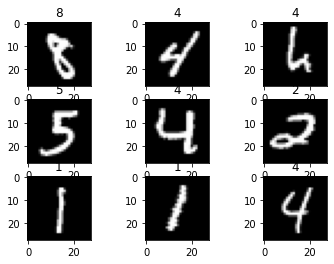

In [11]:
for i in range(9):
    plt.subplot(330 + (i + 1))
    plt.imshow(train_X[i].squeeze(), cmap=plt.get_cmap('gray'))
    plt.title(train_y[i])

In [12]:
from torch.utils.data import DataLoader, TensorDataset

train_X_tensor = torch.tensor(train_X) / 255.0
train_y_tensor = torch.tensor(train_y)
train_tensor = TensorDataset(train_X_tensor, train_y_tensor)

val_X_tensor = torch.tensor(val_X) / 255.0
val_y_tensor = torch.tensor(val_y)
val_tensor = TensorDataset(val_X_tensor, val_y_tensor)

test_tensor = torch.tensor(test) / 255.0

In [13]:
train_loader = DataLoader(train_tensor, batch_size=32, num_workers=2, shuffle=True)
val_loader = DataLoader(val_tensor, batch_size=32, num_workers=2, shuffle=True)
test_loader = DataLoader(test_tensor, batch_size=32, num_workers=2, shuffle=False)

C:\Users\Bill\anaconda3\envs\DeepLearning\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


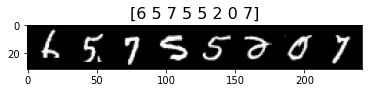

In [14]:
from torchvision.utils import make_grid

for batch_idx, (data, target) in enumerate(train_loader):
    img_grid = make_grid(data[0:8,].unsqueeze(1), nrow=8)
    img_target_labels = target[0:8,].numpy()
    break

plt.imshow(img_grid.numpy().transpose((1,2,0)))
plt.rcParams['figure.figsize'] = (10, 2)
plt.title(img_target_labels, size=16)
plt.show()


In [15]:
from torch import nn
from torch.nn import functional as F
from torch import optim
from torch.autograd import Variable

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
            , nn.BatchNorm2d(32)
            , nn.ReLU()
            , nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
            , nn.BatchNorm2d(32)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2, stride=2)
            , nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
            , nn.BatchNorm2d(64)
            , nn.ReLU()
            , nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
            , nn.BatchNorm2d(64)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5)
            , nn.Linear(3136, 512)
            , nn.BatchNorm1d(512)
            , nn.ReLU()
            , nn.Dropout(p=0.5)
            , nn.Linear(512, 256)
            , nn.BatchNorm1d(256)
            , nn.ReLU()
            , nn.Dropout(p=0.5)
            , nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [16]:
model = CNN()
model = model.cuda()
model

CNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1)

In [17]:
optimizer = optim.Adam(params=model.parameters(), lr=0.001)
crit = nn.CrossEntropyLoss()
steplr = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


In [18]:
def train(num_epoch):
    model.train()
    steplr.step()

    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.unsqueeze(1)
        data, target = Variable(data), Variable(target)

        data = data.cuda()
        target = target.cuda()

        optimizer.zero_grad()
        output = model(data)
        loss = crit(output, target)
        loss.backward()
        optimizer.step()

        if (batch_idx + 1)% 100 == 0:
            print(f'Train Epoch: {num_epoch + 1} --> {(batch_idx + 1) * len(data)}/{len(train_loader.dataset)} '
                  f'({100.0 * (batch_idx + 1) / len(train_loader):.0f}%)\tLoss: {loss.data.item():.6f}')

In [19]:
def evaluate(data_loader):
    model.eval()
    loss = 0
    correct = 0

    for data, target in data_loader:
        data = data.unsqueeze(1)
        data, target = Variable(data), Variable(target)

        data = data.cuda()
        target = target.cuda()

        output = model(data)

        loss += F.cross_entropy(output, target, size_average=False).data.item()

        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    loss /= len(data_loader.dataset)

    print(f'\nLoss: {loss:.4f} \t Val Accuracy: {correct}/{len(data_loader.dataset)} '
          f'({100.0 * correct / len(data_loader.dataset):.3f}%)\n')

In [20]:
for i in range(30):
    train(i)
    evaluate(val_loader)

C:\Users\Bill\anaconda3\envs\DeepLearning\lib\site-packages\torch\optim\lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
C:\Users\Bill\anaconda3\envs\DeepLearning\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Train Epoch: 1 --> 3200/33600 (10%)	Loss: 0.555730
Train Epoch: 1 --> 6400/33600 (19%)	Loss: 0.380974
Train Epoch: 1 --> 9600/33600 (29%)	Loss: 0.126147
Train Epoch: 1 --> 12800/33600 (38%)	Loss: 0.156606
Train Epoch: 1 --> 16000/33600 (48%)	Loss: 0.375939
Train Epoch: 1 --> 19200/33600 (57%)	Loss: 0.103520
Train Epoch: 1 --> 22400/33600 (67%)	Loss: 0.328539
Train Epoch: 1 --> 25600/33600 (76%)	Loss: 0.212159
Train Epoch: 1 --> 28800/33600 (86%)	Loss: 0.022426
Train Epoch: 1 --> 32000/33600 (95%)	Loss: 0.286299

Loss: 0.0432 	 Val Accuracy: 8288/8400 (98.667%)

Train Epoch: 2 --> 3200/33600 (10%)	Loss: 0.053364
Train Epoch: 2 --> 6400/33600 (19%)	Loss: 0.089609
Train Epoch: 2 --> 9600/33600 (29%)	Loss: 0.107284
Train Epoch: 2 --> 12800/33600 (38%)	Loss: 0.401920
Train Epoch: 2 --> 16000/33600 (48%)	Loss: 0.025816
Train Epoch: 2 --> 19200/33600 (57%)	Loss: 0.278416
Train Epoch: 2 --> 22400/33600 (67%)	Loss: 0.038921
Train Epoch: 2 --> 25600/33600 (76%)	Loss: 0.083833
Train Epoch: 2 --> 

In [34]:
model.eval()
predictions = torch.LongTensor()

for i, data in enumerate(test_loader):
    data = data.unsqueeze(1)
    data = data.cuda()

    output = model(data)
    pred = output.cpu().data.max(1, keepdim=True)[1]
    predictions = torch.cat((predictions, pred), dim=0)

In [35]:
submission = pd.read_csv('./Data/sample_submission.csv')
submission['Label'] = predictions.numpy().squeeze()
submission.head()


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [36]:
submission.to_csv('submission.csv', index=False)

Submission Accuracy: 99.442% <br>
Submission Rank: 547 / 3059
